### Display Raw Data

Notes: without standardization and using O1, O2, P3, P4 channels for alpha wave and SSVEP figures, it looks very noisy. With standardization looks better. Flattening helps a little but not as much as standardization.

In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
import glob

import matplotlib.pyplot as plt
import mne

import data_postprocessing as dpp

eegData = dpp.eegData(path='Nates')
eegData.load_clean_all_data()

# Figure 1: Raw data

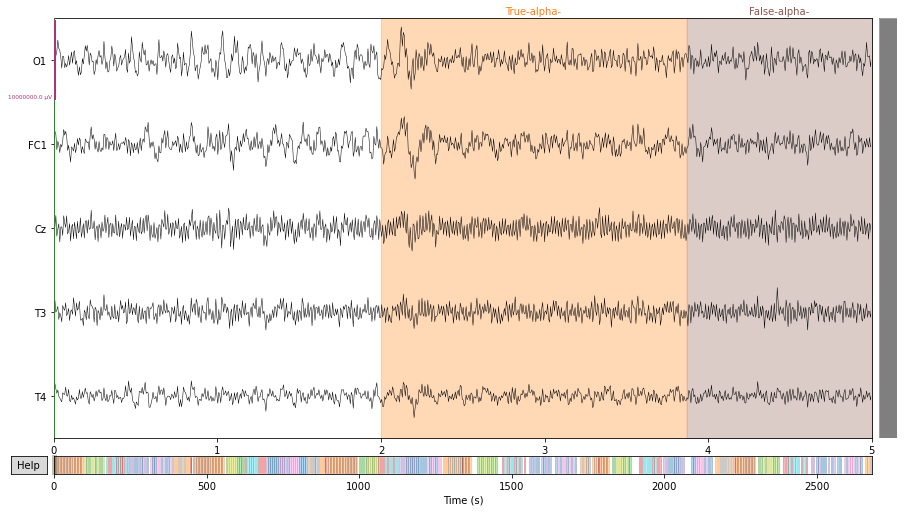

In [80]:
chns = eegData.data.info.ch_names

picks= ["O1", "FC1", "Cz", "T3", "T4"]

chn_idxs = [chns.index(chn) for chn in picks]

f = eegData.data.plot(scalings={'eeg': 5}, order=chn_idxs, n_channels=5, duration=5, event_color={-1:'w'})
f.savefig('3_sample_data.png', dpi=300)

### Display Alpha-Waves on a Spectrogram

In [81]:
epoch_type = "alpha"

f1, f2 = dpp.get_epochs(epoch_type, eegData.data, nperseg=2000, noverlap=1000, channels=['O1', 'O2', 'P3',  'P4'])

Used Annotations descriptions: ['False-alpha-']
Not setting metadata
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Loading data for 41 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-alpha-']
Not setting metadata
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Loading data for 44 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


## Figure 1 - alpha waves

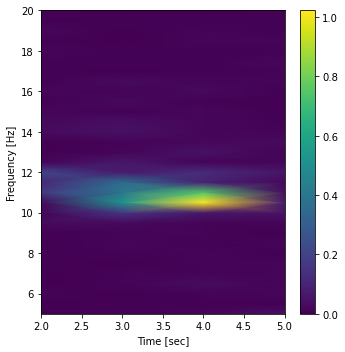

In [86]:
z = 1
dpp.plot_spectrogram(f2.times[z], f2.frequencies[z], f2.spectrograms[z], vmax=None, savefig=True, filename='1_alpha_waves.png', ylim=[5, 20])

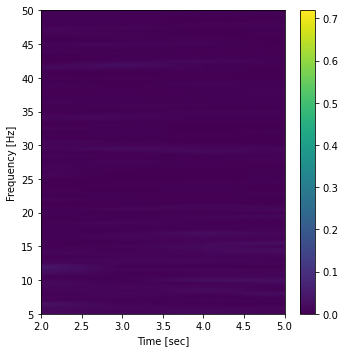

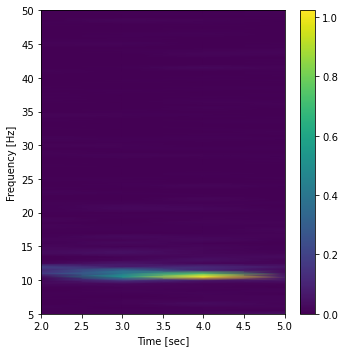

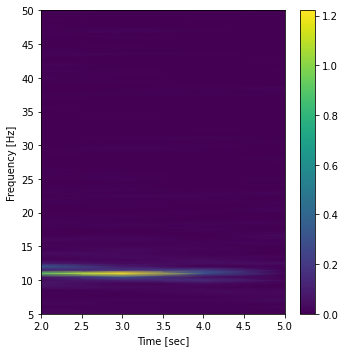

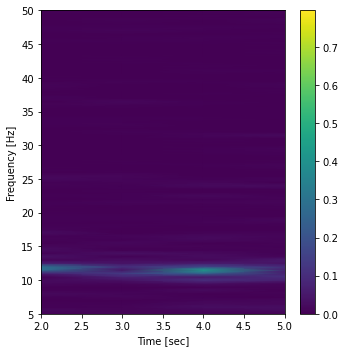

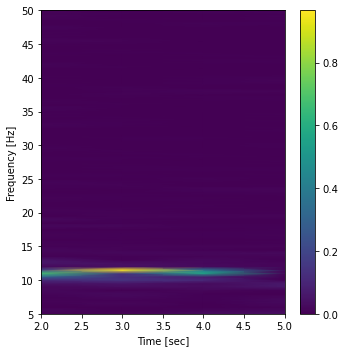

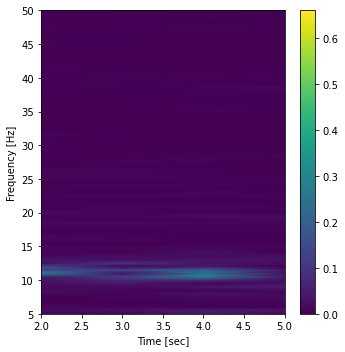

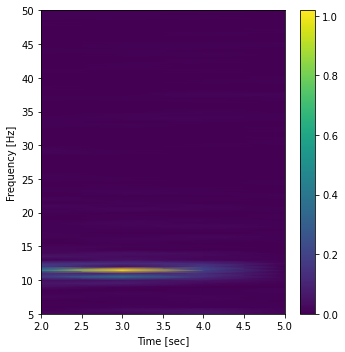

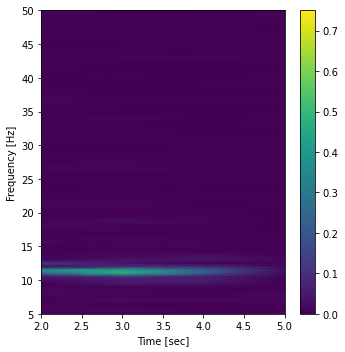

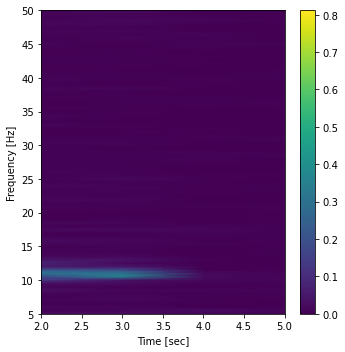

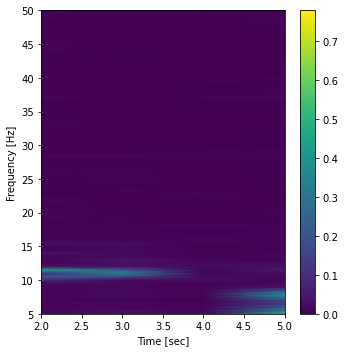

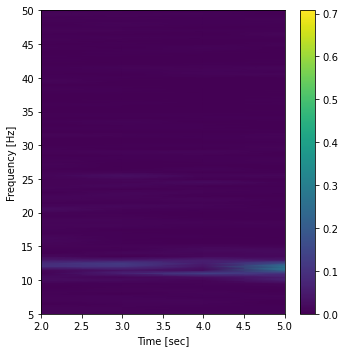

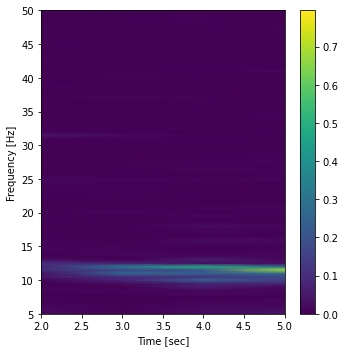

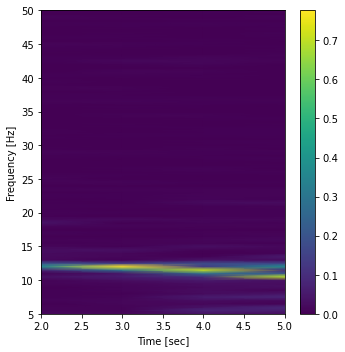

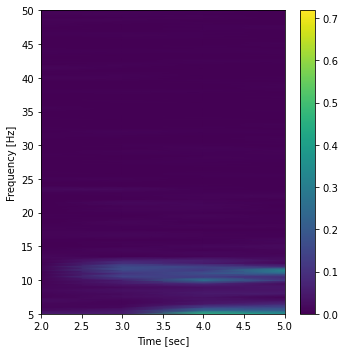

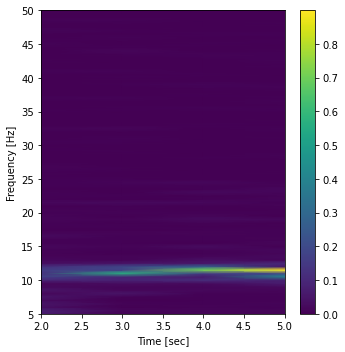

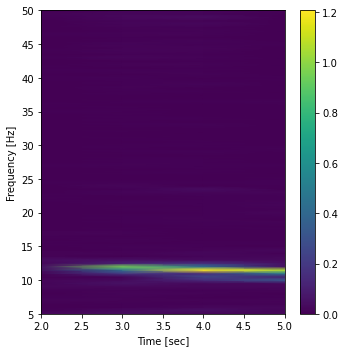

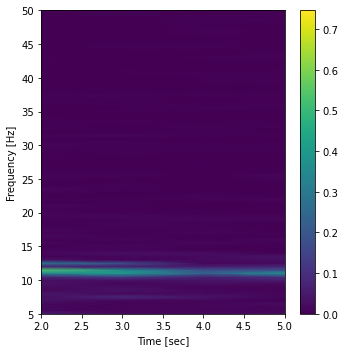

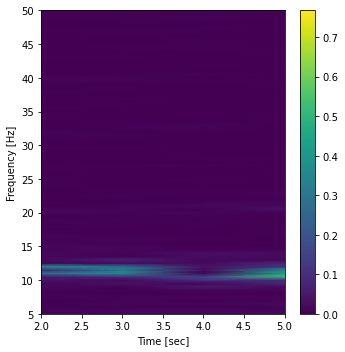

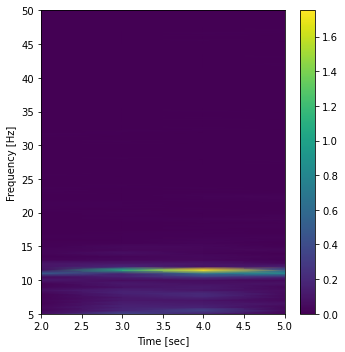

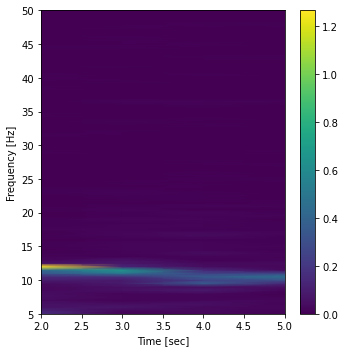

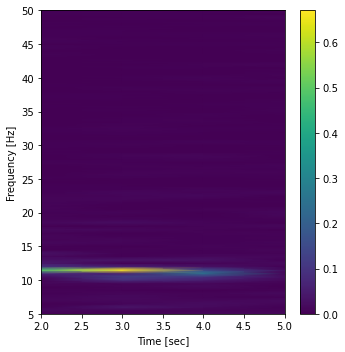

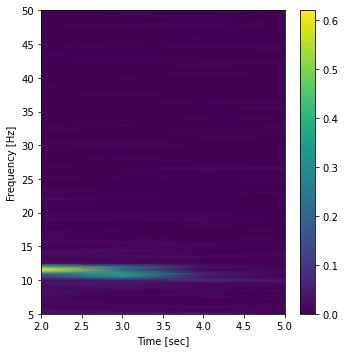

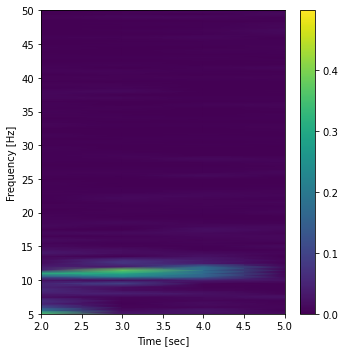

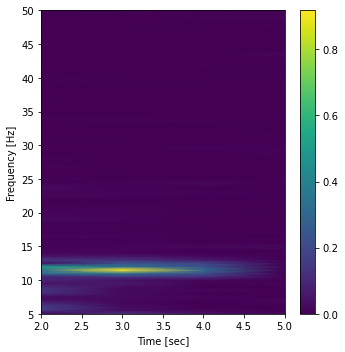

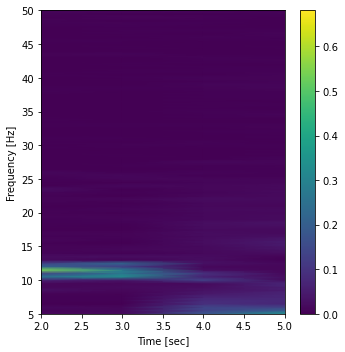

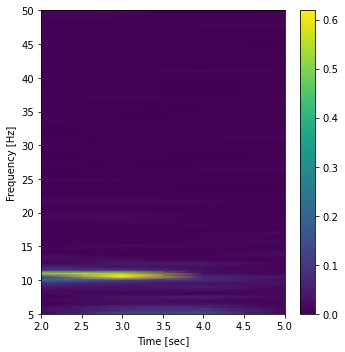

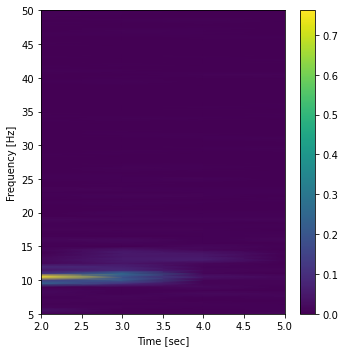

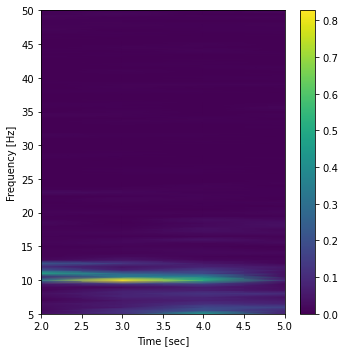

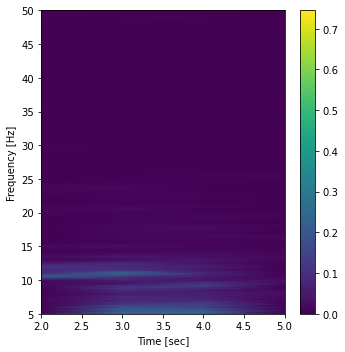

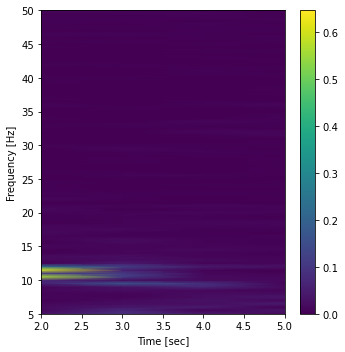

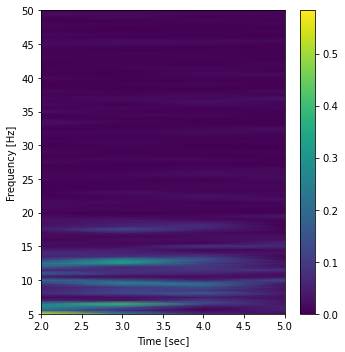

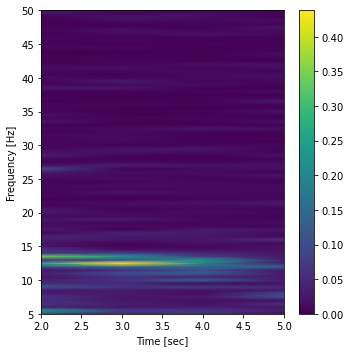

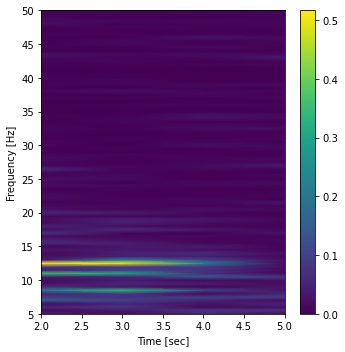

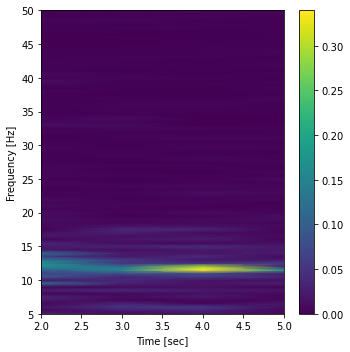

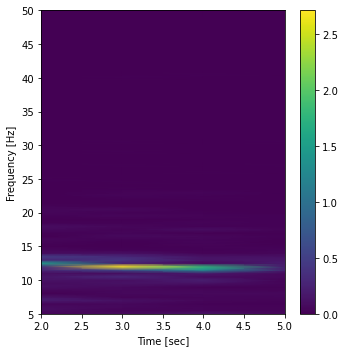

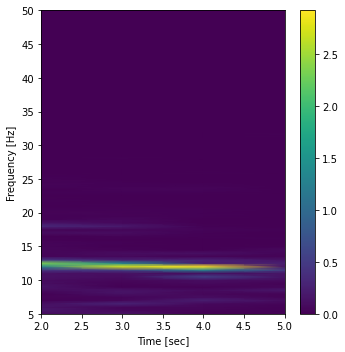

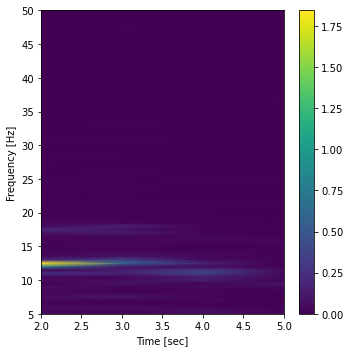

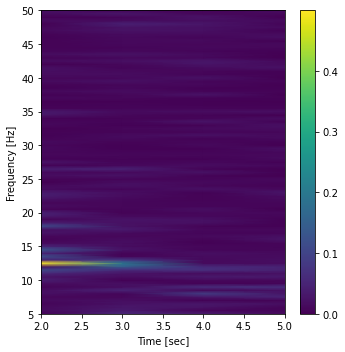

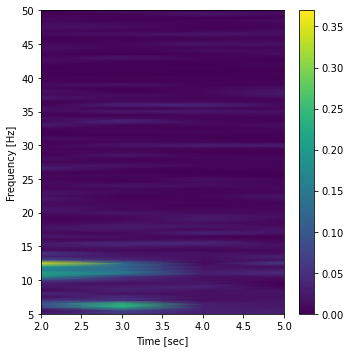

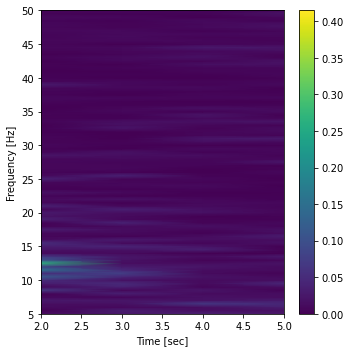

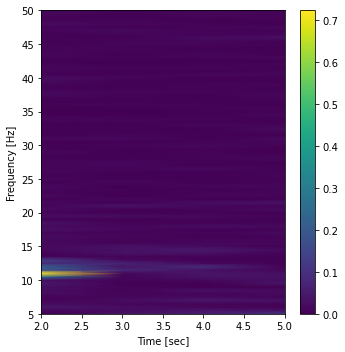

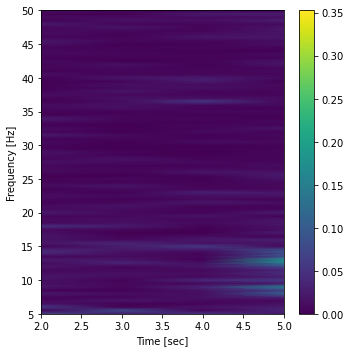

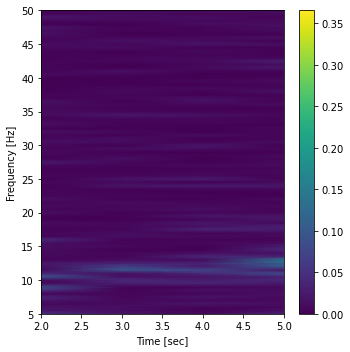

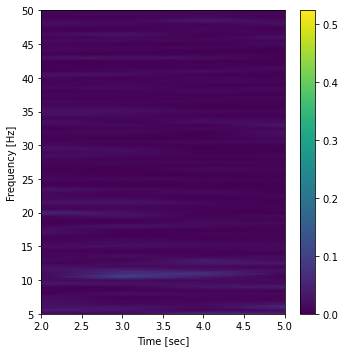

In [68]:
for z in range(len(f2.spectrograms)):
    dpp.plot_spectrogram(f2.times[z], f2.frequencies[z], f2.spectrograms[z], vmax=None)

## Load SSVEP
Spectrogram of SSVEP

In [89]:
f1, f2 = dpp.get_epochs('SSVEP', eegData.data, nperseg=2000, noverlap=1800, channels=['O1', 'O2', 'P3',  'P4'])

Used Annotations descriptions: ['False-SSVEP-']
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Loading data for 30 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-SSVEP-']
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Loading data for 30 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


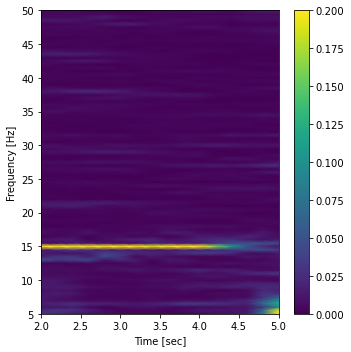

In [75]:
z = 5
dpp.plot_spectrogram(f1.times[z], f1.frequencies[z], f1.spectrograms[z], vmax=0.2)

0


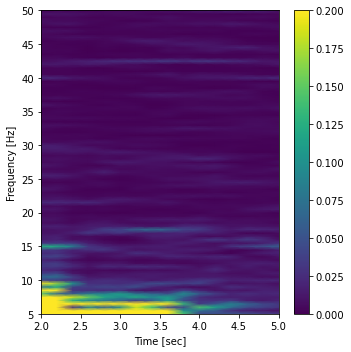

1


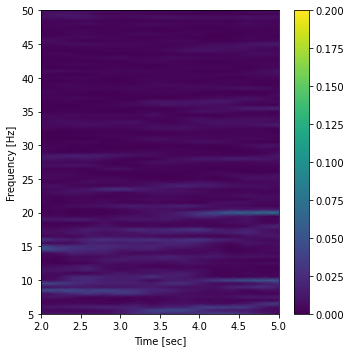

2


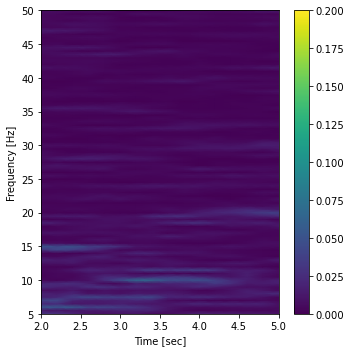

3


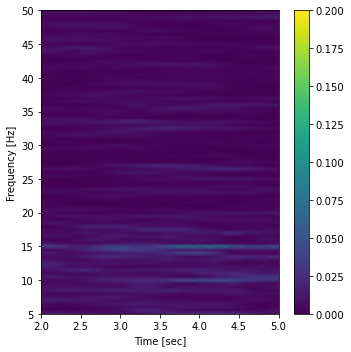

4


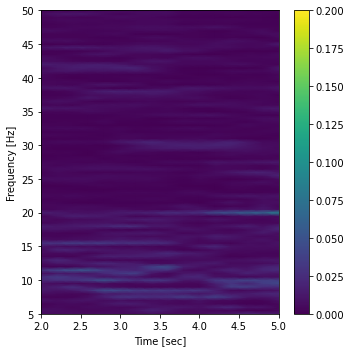

5


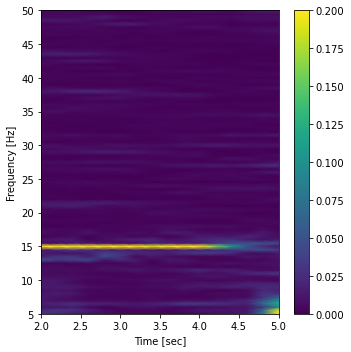

6


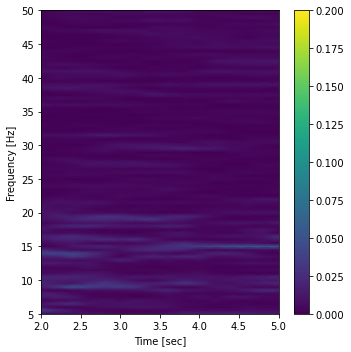

7


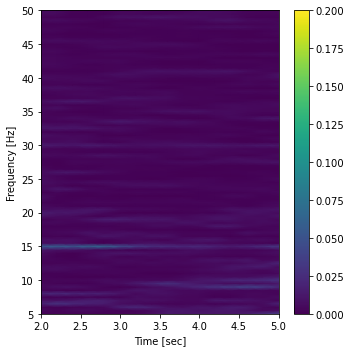

8


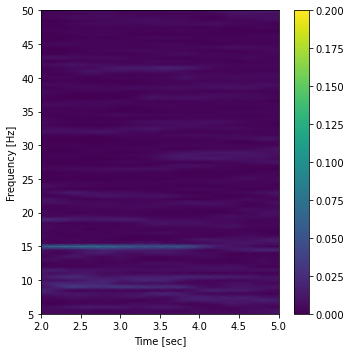

9


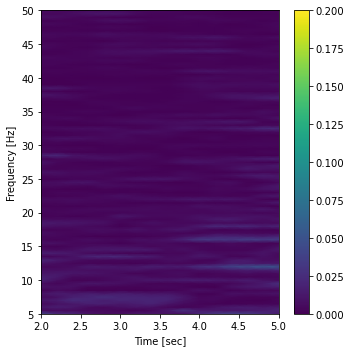

10


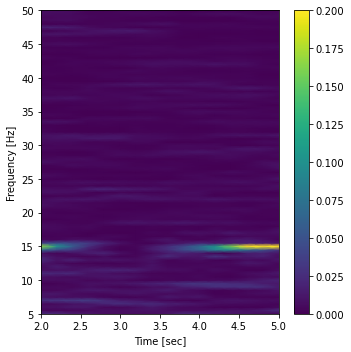

11


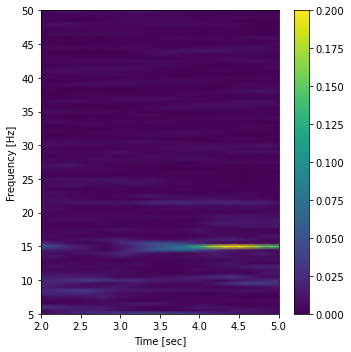

12


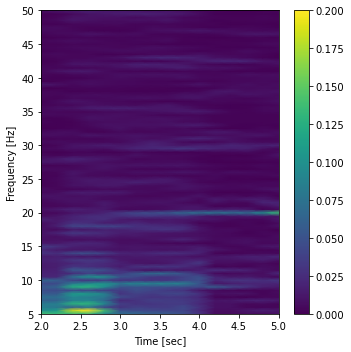

13


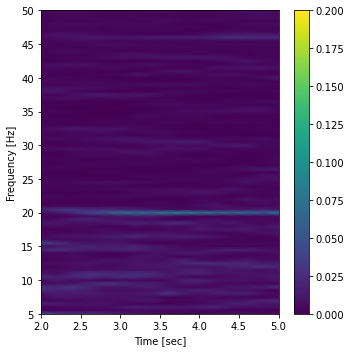

14


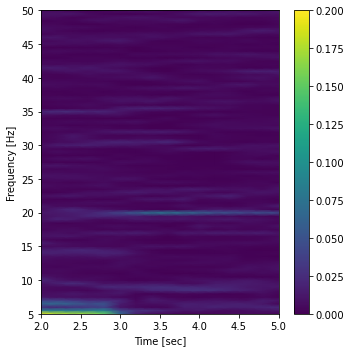

15


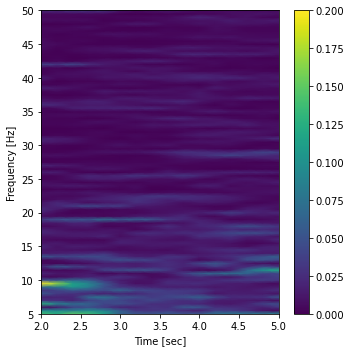

16


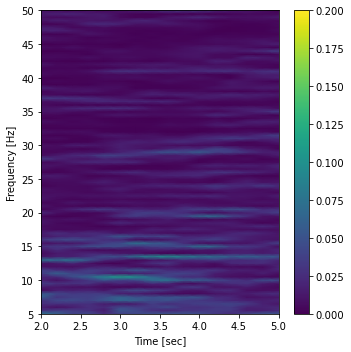

17


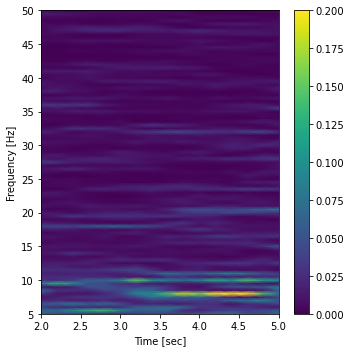

18


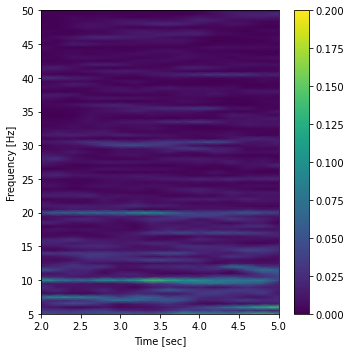

19


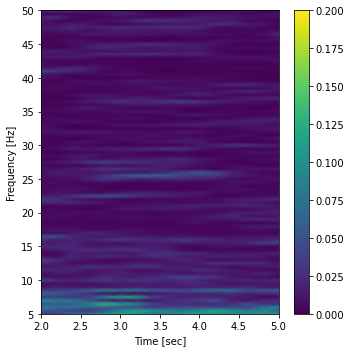

20


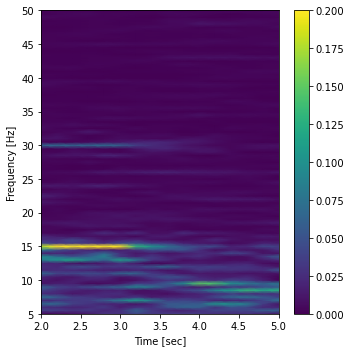

21


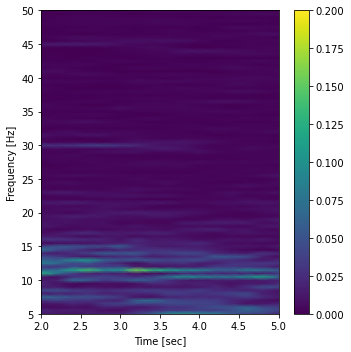

22


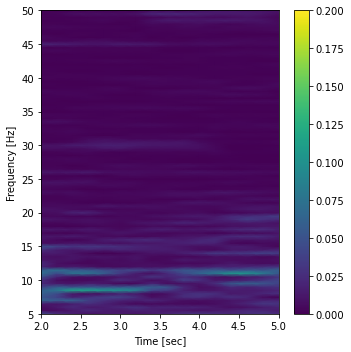

23


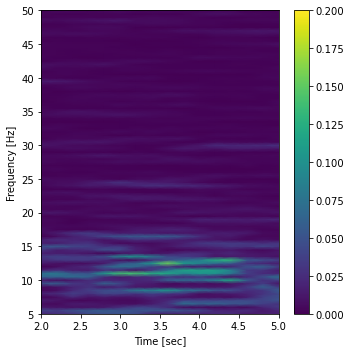

24


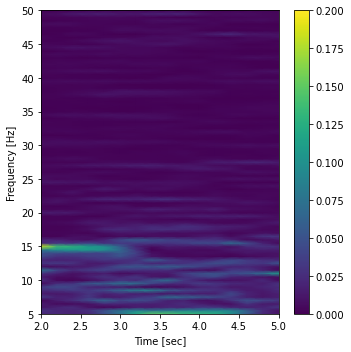

25


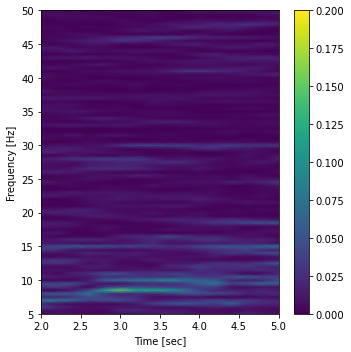

26


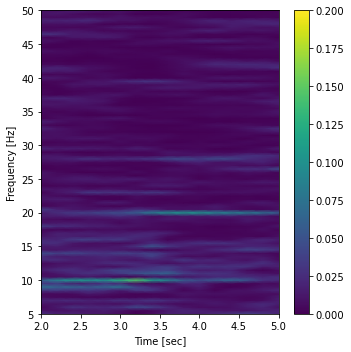

27


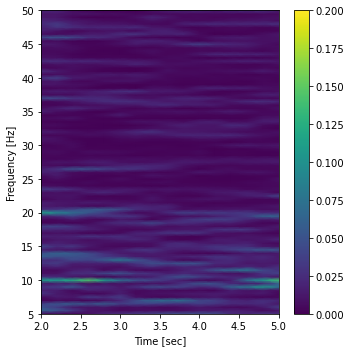

28


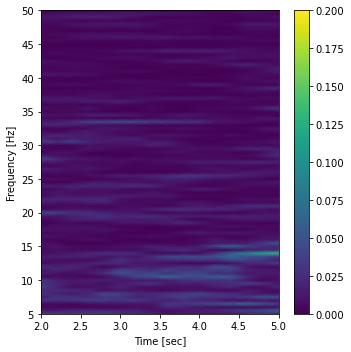

29


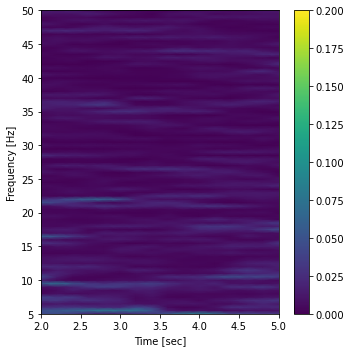

In [76]:
for i, z in enumerate(range(len(f1.spectrograms))):
    print(i)
    dpp.plot_spectrogram(f1.times[z], f1.frequencies[z], f1.spectrograms[z], vmax=0.2)

0


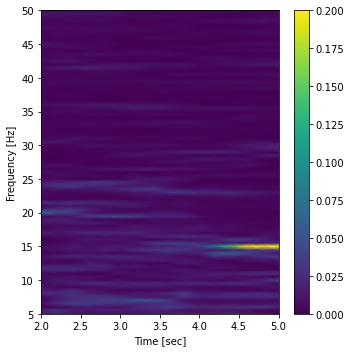

1


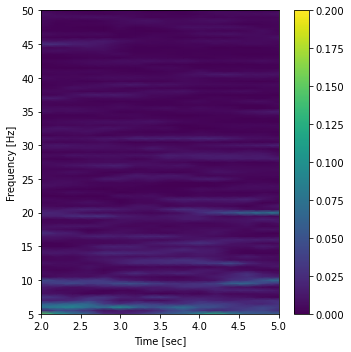

2


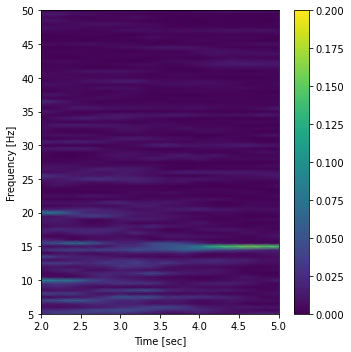

3


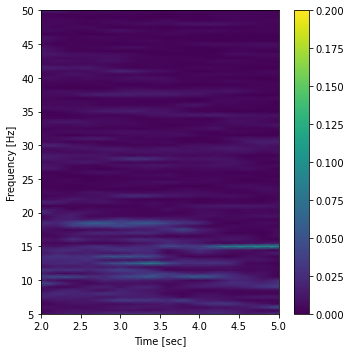

4


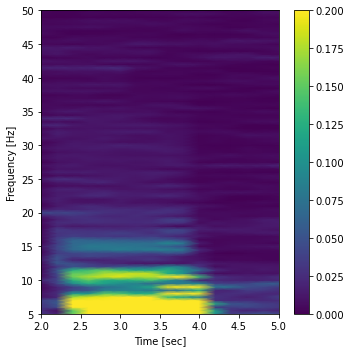

5


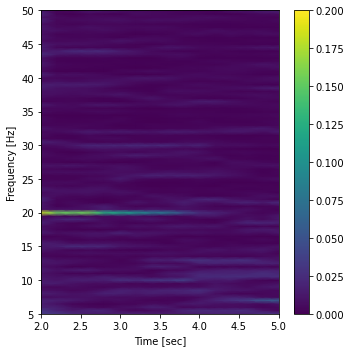

6


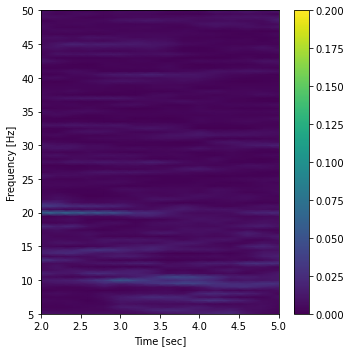

7


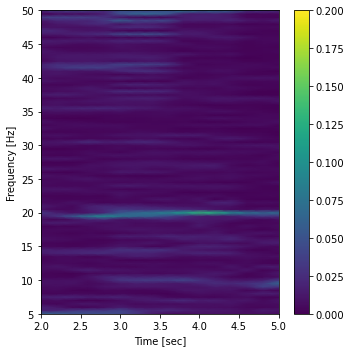

8


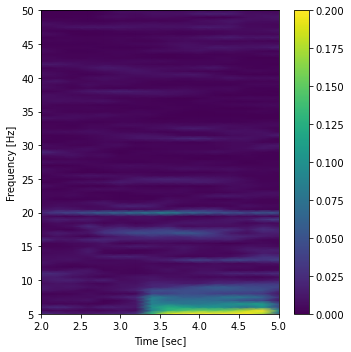

9


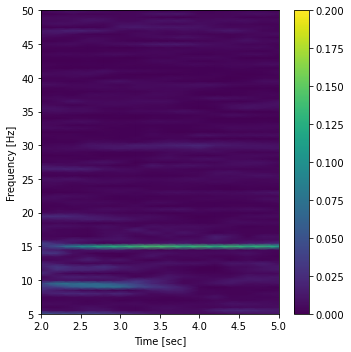

10


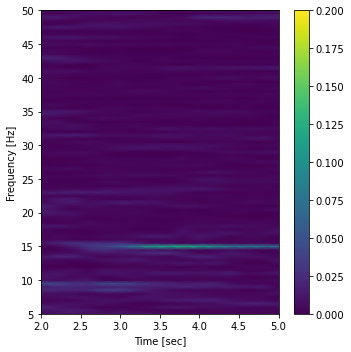

11


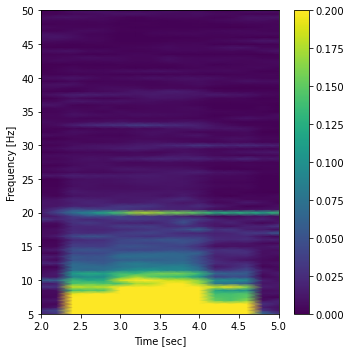

12


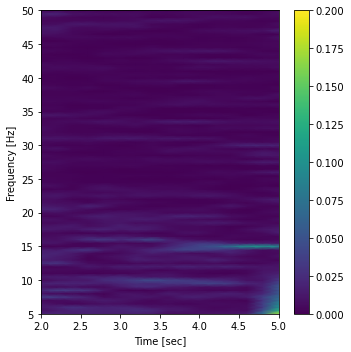

13


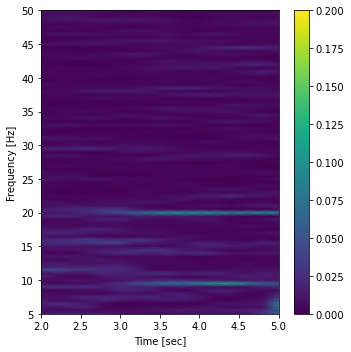

14


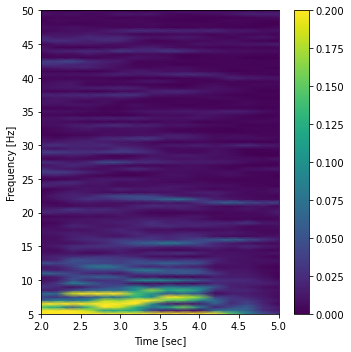

15


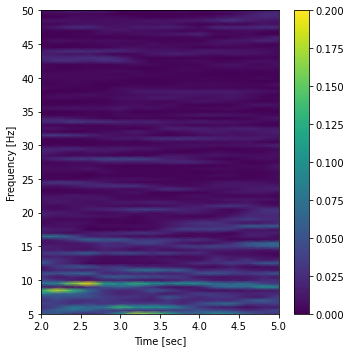

16


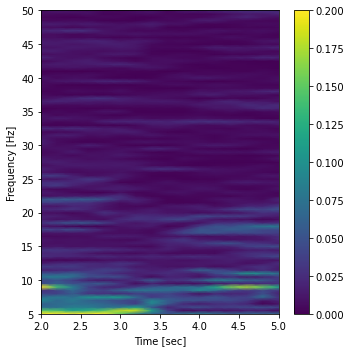

17


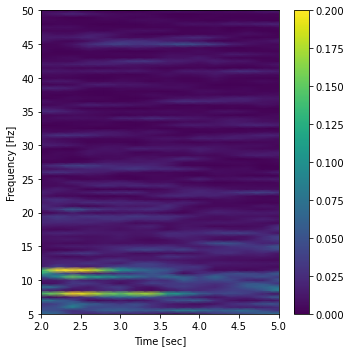

18


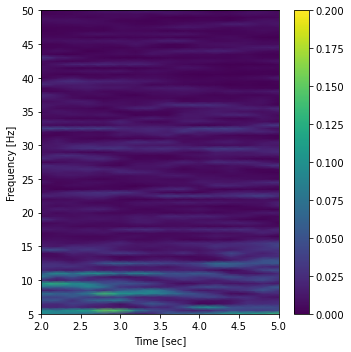

19


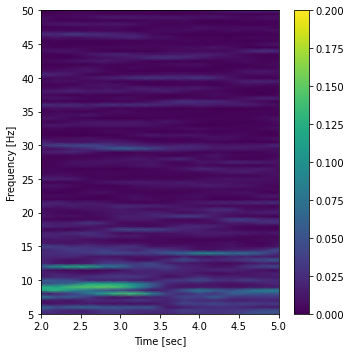

20


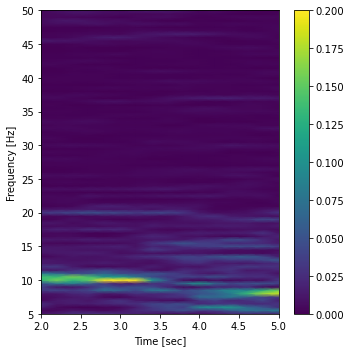

21


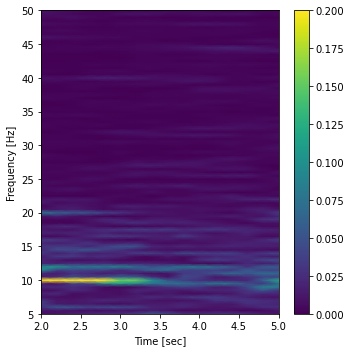

22


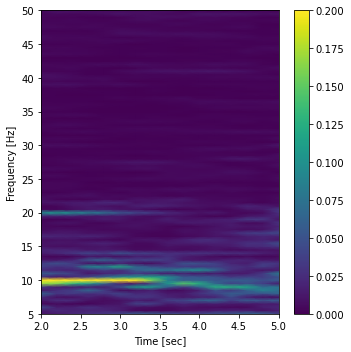

23


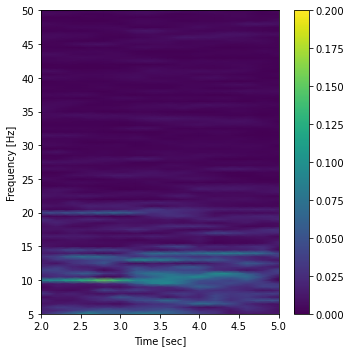

24


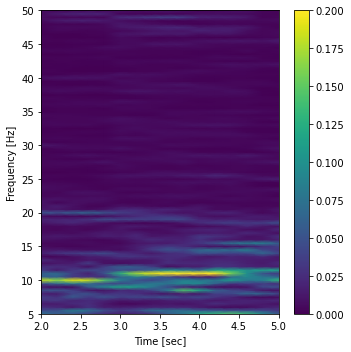

25


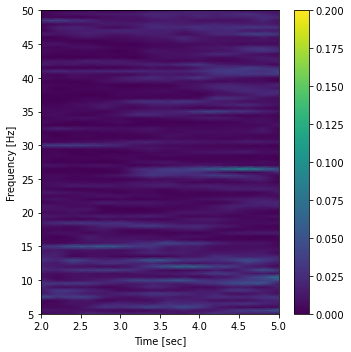

26


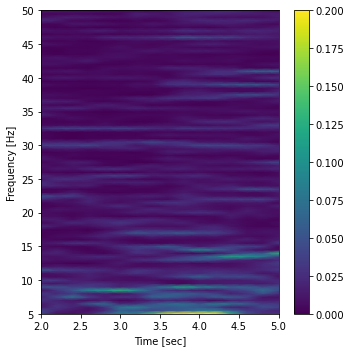

27


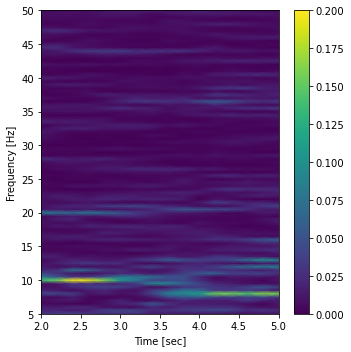

28


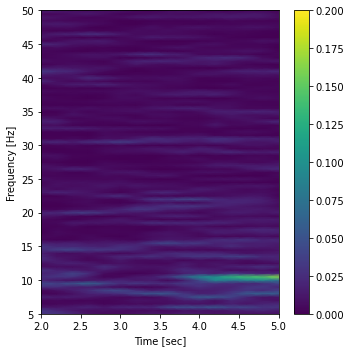

29


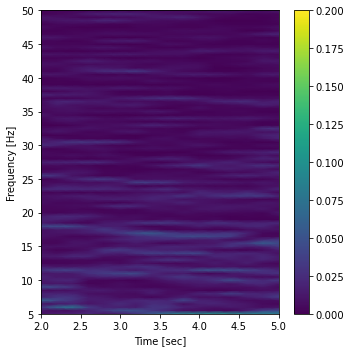

In [77]:
for i, z in enumerate(range(len(f2.spectrograms))):
    print(i)
    dpp.plot_spectrogram(f2.times[z], f2.frequencies[z], f2.spectrograms[z], vmax=0.2)

## Figure 3
2 examples of good SSVEP data on top, 2 examples of bad data on bottom

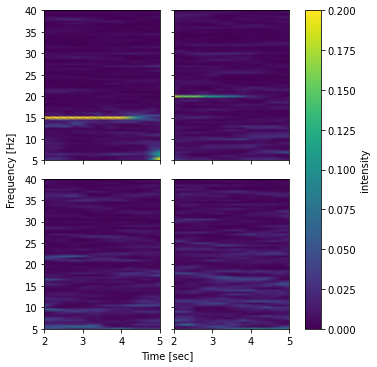

In [91]:
import numpy as np

vmax = 0.2
ylim = [5, 40]
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5.5, 5.5))
# can use this with ax0.set_xlabel() to set a global x label with older matplotlib
ax0 = f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

idx = 5
pcm = ax[0][0].pcolormesh(f1.times[idx], f1.frequencies[idx], f1.spectrograms[idx], shading='gouraud', vmax=vmax)
ax[0][0].set_ylim(ylim)

ax[0][1].pcolormesh(f2.times[idx], f2.frequencies[idx], f2.spectrograms[idx], shading='gouraud', vmax=vmax)
ax[0][1].set_ylim(ylim)

idx = -1
ax[1][0].pcolormesh(f1.times[idx], f1.frequencies[idx], f1.spectrograms[idx], shading='gouraud', vmax=vmax)
ax[1][0].set_ylim(ylim)


ax[1][1].pcolormesh(f2.times[idx], f2.frequencies[idx], f2.spectrograms[idx], shading='gouraud', vmax=vmax)
ax[1][1].set_ylim(ylim)


ax0.set_ylabel('Frequency [Hz]', x=0.4)
ax0.set_xlabel('Time [sec]', x=0.4)
plt.tight_layout()
# f.supylabel('Frequency [Hz]')
# f.supxlabel('Time [sec]', x=0.45)
f.colorbar(pcm, ax=ax, label='intensity')

plt.savefig('4_SSVEP_spectrograms.png', dpi=300, facecolor='w')

## Figure 4
spectrograms of motor imagery, maybe similar to https://web.media.mit.edu/~cvx/sht.htm

## Figure 5
maybe similar with laryngeal https://web.media.mit.edu/~cvx/sht.htm

# other

2 other figures with the CSP results for MI and LI